In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Simulation setup
initial_rate = 0.03
num_paths = 50
num_steps = 12
dt = 1/12  # monthly steps
time = np.arange(0, 1, dt)

# Vasicek Model Parameters
kappa = 0.5
theta = 0.04
sigma = 0.01

# Cox-Ingersoll-Ross (CIR) Model Parameters (using similar parameters with adjustments)
kappa_cir = 0.5
theta_cir = 0.04
sigma_cir = 0.02


# Hull-White Model Parameters (using similar parameters to Vasicek for simplicity)
kappa_hw = 0.5
theta_hw = 0.04
sigma_hw = 0.01

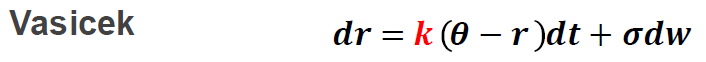

In [14]:
from IPython.display import display
from PIL import Image
img = Image.open("trial.png")
display(img)

In [14]:
# Vasicek Model Simulation
rates_vasicek_1yr = np.zeros((num_paths, num_steps))
rates_vasicek_1yr[:, 0] = initial_rate
for i in range(1, num_steps):
    brownian = np.random.normal(0, np.sqrt(dt), num_paths)
    rates_vasicek_1yr[:, i] = rates_vasicek_1yr[:, i-1] + kappa * (theta - rates_vasicek_1yr[:, i-1]) * dt + sigma * brownian

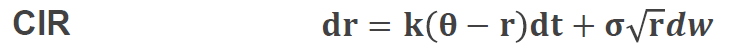

In [12]:
from IPython.display import display
from PIL import Image
img = Image.open("cir.png")
display(img)

In [4]:
# CIR Model Simulation
rates_cir_1yr = np.zeros((num_paths, num_steps))
rates_cir_1yr[:, 0] = initial_rate
for i in range(1, num_steps):
    brownian = np.random.normal(0, np.sqrt(dt), num_paths)
    rates_cir_1yr[:, i] = rates_cir_1yr[:, i-1] + kappa_cir * (theta_cir - rates_cir_1yr[:, i-1]) * dt + sigma_cir * np.sqrt(rates_cir_1yr[:, i-1]) * brownian
rates_cir_1yr = np.maximum(rates_cir_1yr, 0)

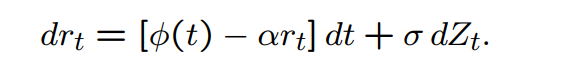

In [13]:
from IPython.display import display
from PIL import Image
img = Image.open("hw.png")
display(img)

In [5]:
# Hull-White Model Simulation
rates_hw_1yr = np.zeros((num_paths, num_steps))
rates_hw_1yr[:, 0] = initial_rate
for i in range(1, num_steps):
    brownian = np.random.normal(0, np.sqrt(dt), num_paths)
    rates_hw_1yr[:, i] = rates_hw_1yr[:, i-1] + kappa_hw * (theta_hw - rates_hw_1yr[:, i-1]) * dt + sigma_hw * brownian


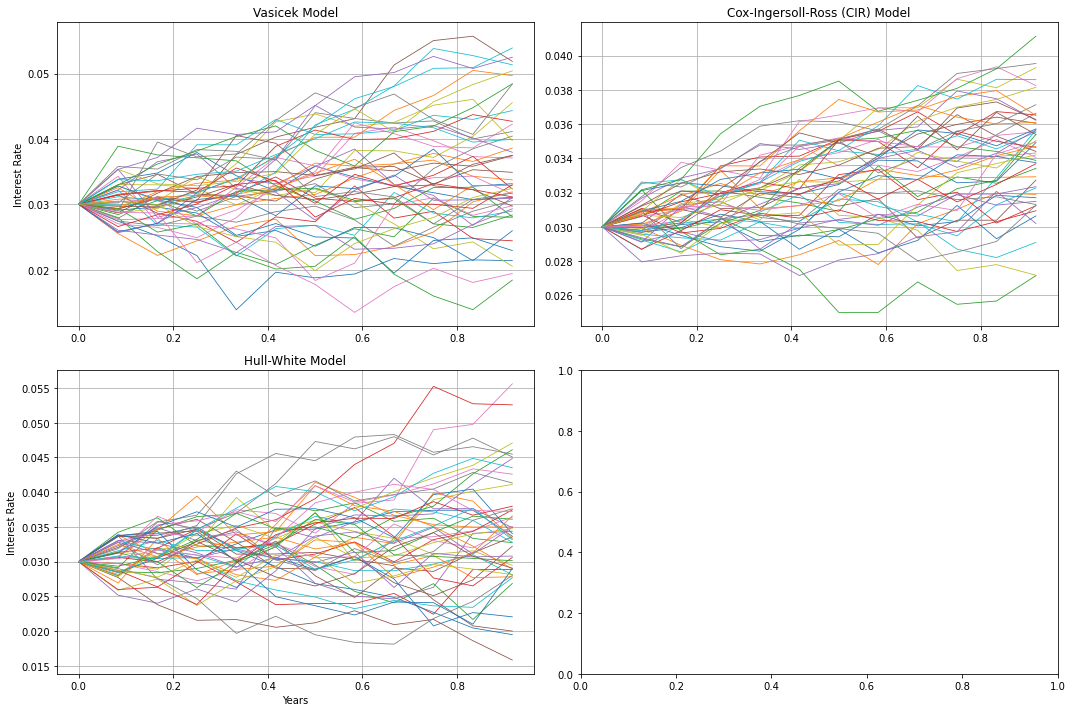

In [13]:
# Create subplots for all the models over 1 year
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


# Plot Vasicek Model simulations
for i in range(num_paths):
    axs[0, 0].plot(time, rates_vasicek_1yr[i, :], lw=0.8)
axs[0, 0].set_title('Vasicek Model')
axs[0, 0].set_ylabel('Interest Rate')
axs[0, 0].grid(True)

# Plot CIR Model simulations
for i in range(num_paths):
    axs[0, 1].plot(time, rates_cir_1yr[i, :], lw=0.8)
axs[0, 1].set_title('Cox-Ingersoll-Ross (CIR) Model')
axs[0, 1].grid(True)

# Plot Hull-White Model simulations
for i in range(num_paths):
    axs[1, 0].plot(time, rates_hw_1yr[i, :], lw=0.8)
axs[1, 0].set_title('Hull-White Model')
axs[1, 0].set_xlabel('Years')
axs[1, 0].set_ylabel('Interest Rate')
axs[1, 0].grid(True)


plt.tight_layout()
plt.show()


In [17]:
#Approx values 
#Extract predicted rates at the end of the next month and compute mean and standard deviation
mean_vasicek = np.mean(rates_vasicek_1yr[:, 1])
std_vasicek = np.std(rates_vasicek_1yr[:, 1])

mean_cir = np.mean(rates_cir_1yr[:, 1])
std_cir = np.std(rates_cir_1yr[:, 1])

mean_hw = np.mean(rates_hw_1yr[:, 1])
std_hw = np.std(rates_hw_1yr[:, 1])

mean_bdt = np.mean(rates_bdt_1yr[:, 1])
std_bdt = np.std(rates_bdt_1yr[:, 1])

mean_vasicek, std_vasicek, mean_cir, std_cir, mean_hw, std_hw, mean_bdt, std_bdt

(0.030742502931227114,
 0.002813964710801836,
 0.0303943501239624,
 0.0010242060924544895,
 0.030699785074299935,
 0.0023528243226576023,
 0.029500406887765583,
 0.0029239053853758433)